In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [5]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)


In [6]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [7]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [8]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [9]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


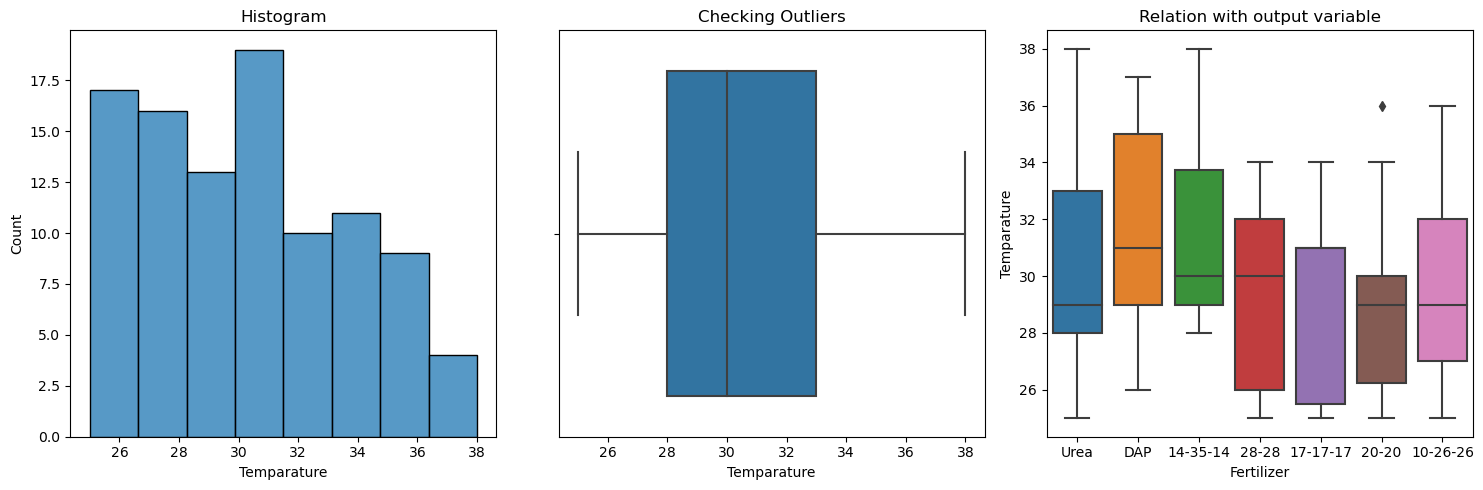

In [10]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])
#EDA - Temparature variable
plot_conti(data.Temparature)

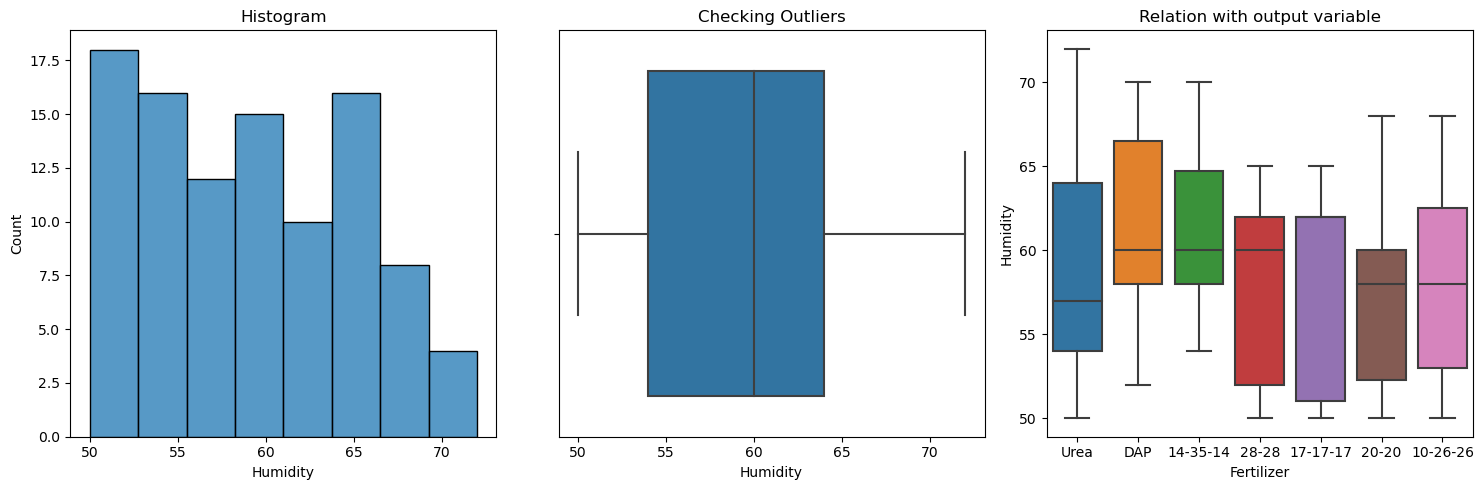

In [11]:
#EDA - Humidity variable
plot_conti(data.Humidity)

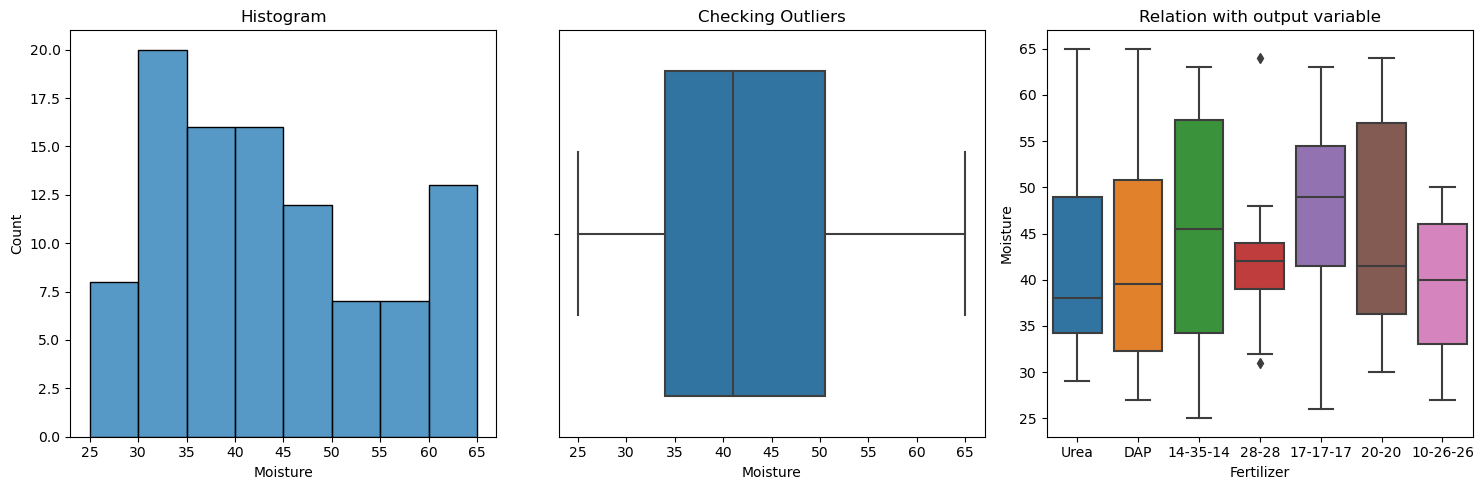

In [12]:
#EDA - Moisture variable
plot_conti(data.Moisture)

<AxesSubplot:xlabel='Soil_Type', ylabel='Temparature'>

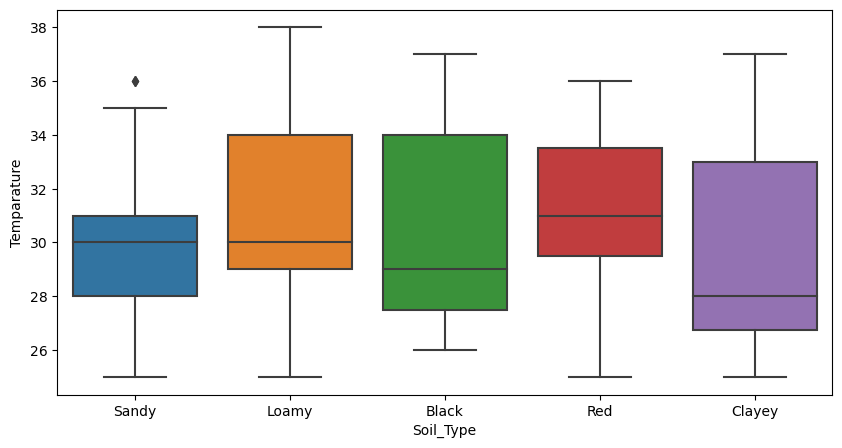

In [13]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temparature)

<AxesSubplot:>

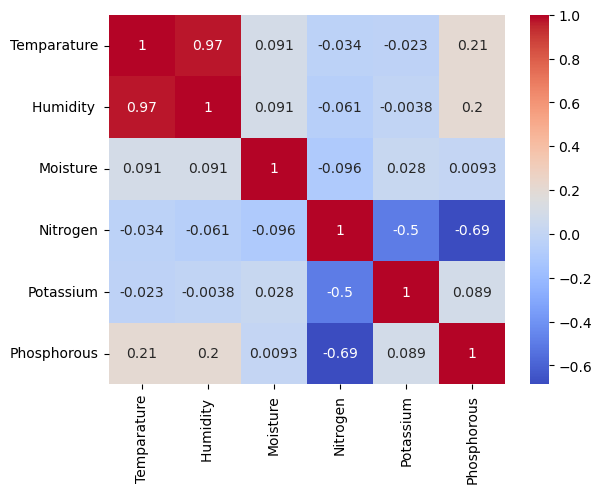

In [3]:
corr=data.corr()
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [14]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [15]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [16]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [17]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [18]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))


Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil_Type    79 non-null     int32
 4   Crop_Type    79 non-null     int32
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int32(2), int64(6)
memory usage: 4.9 KB


In [20]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [22]:
pred_rand = rand.fit(x_train,y_train).predict(x_test)

print(classification_report(y_test,pred_rand))


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20



In [23]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  0.9876543209876543
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
#Final Model
params = {
    'n_estimators':[350,400,450],
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(data.drop('Fertilizer',axis=1),data.Fertilizer)

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best score :  0.98989898989899
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}


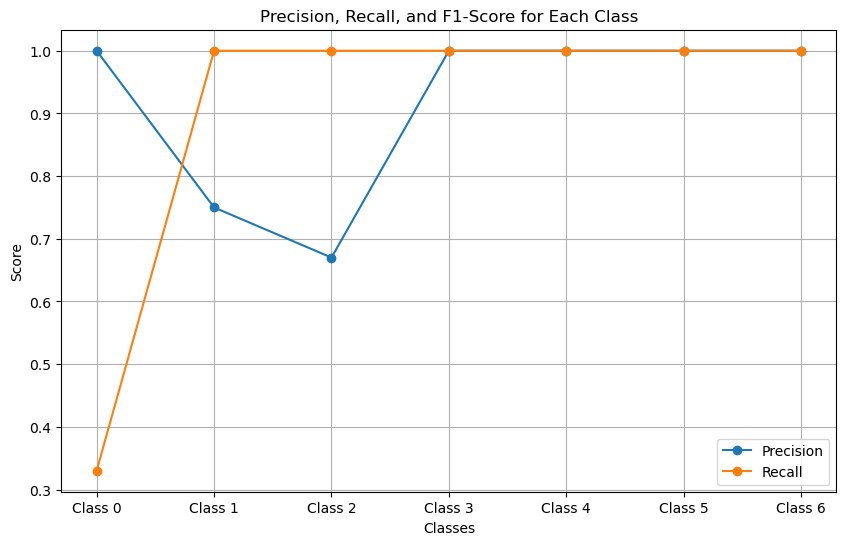

In [29]:
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values
precision = [1.00, 0.75, 0.67, 1.00, 1.00, 1.00, 1.00]
recall = [0.33, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
#f1_score = [0.50, 0.86, 0.80, 1.00, 1.00, 1.00, 1.00]

# Labels for each class
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(classes, precision, marker='o', label='Precision')
plt.plot(classes, recall, marker='o', label='Recall')
#plt.plot(classes, f1_score, marker='o', label='F1-Score')

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


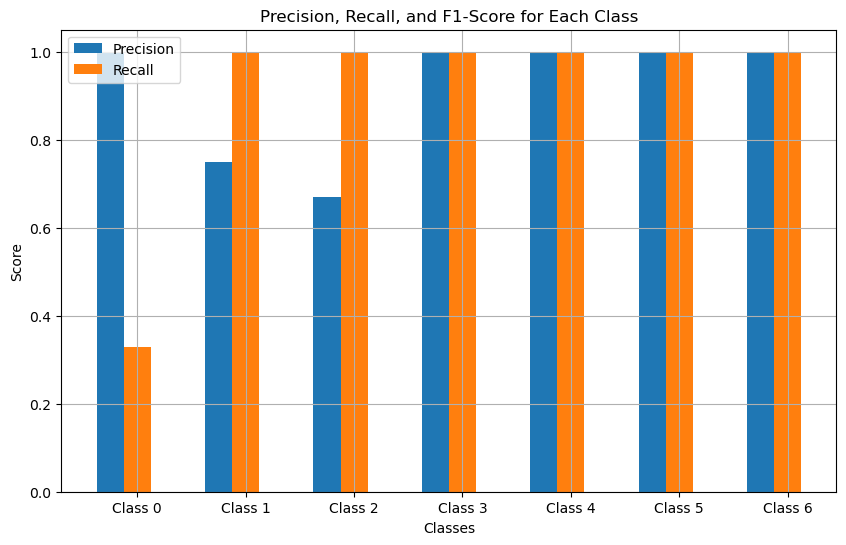

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Precision, Recall, and F1-score values
precision = [1.00, 0.75, 0.67, 1.00, 1.00, 1.00, 1.00]
recall = [0.33, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
#f1_score = [0.50, 0.86, 0.80, 1.00, 1.00, 1.00, 1.00]

# Labels for each class
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']

# Width of the bars
bar_width = 0.25

# Set positions for the bars
index = np.arange(len(classes))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, precision, width=bar_width, label='Precision')
plt.bar(index + bar_width, recall, width=bar_width, label='Recall')
#plt.bar(index + 2 * bar_width, f1_score, width=bar_width, label='F1-Score')

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xticks(index + bar_width, classes)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
